# Distribucije

## Normalna distribucija

Slučajna varijabla X ima normalnu distribuciju s parametrima $\mu$ i $\sigma$ > 0 ako joj je funkcija gustoće:
    
$f(x) = \frac{1}{\sigma \sqrt{2 \pi}}e^\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$
    
Tada pišemo X~N($\mu$,$\sigma^2$)


Definiramo funkciju gustoće jedinične normalne razdiobe u pythonu te ju prikažimo grafički:

In [10]:
import sympy as sp
sp.init_printing()

In [11]:
def f(x):
    z = (1/(sp.sqrt(2*sp.pi)))*sp.E**((-x**2)/(2))
    return z

In [61]:
f(0)

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

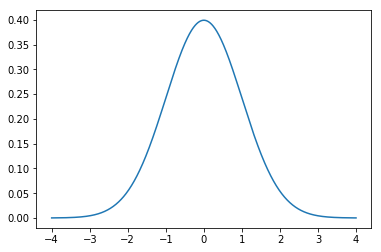

In [14]:
import numpy as np

x = np.linspace(-4,4,num=1000)
plt.plot(x,f(x))

Normalna distribucija je vrlo važna u primjeni. Primjenjuje se u raznim prirodnim znanostima, kao i u u znanostima koje se bave proučavanjem ponašanja. Mnoštvo rezultata psiholoških testova i fizičkih pojava slijede normalnu razdiobu. Graf normalne razdiobe nazivamo još i Gaussova krivulja. Ona govori o prirodi nasumičnosti. Smisao je u tome da, stvari kad se mijenjaju, nastoje ostati u blizini točke prosjeka, pa se raspoređuju oko tog prosjeka po glatkoj, zvonolikoj krivulji. Njena specifičnost je u tome što se 50 % podataka za koje se krivulja crta nalazi na jednoj strani krivulje, dok je ostalih 50 % podataka na drugoj strani. 

#### Primjer 1. 
Testirajmo hipotezu da podaci dolaze iz jedinične normalne razdiobe uz razinu značajnosti $\alpha$ = 0.05 

In [16]:
x = [1.464, 1.137, 3.455, 0.677, 0.932, 1.296, 0.812, 2.298, 1.241, 0.043, 1.060, -1.526, 0.469, -0.588, -0.190, -0.865]
x = sorted(x)
x

In [63]:
t = sp.Symbol('t')
eksp = sp.E**((-t**2)/(2))
eksp

In [17]:
sp.Integral(eksp,(t,-sp.oo,3.455)).doit()

In [18]:
z=[]
for i in range(0,16):
    z.append((1/(sp.sqrt(2*sp.pi)))*(sp.Integral(eksp,(t,-sp.oo,x[i])).doit()))
z

In [19]:
z = sorted(z)
z

In [20]:
l = []
d = []
y = []
def Dn(y,n):
    for i in range(1,n+1):
        l.append(sp.Abs(((i-1)/n)-z[i-1]))
        d.append(sp.Abs((i/n)-z[i-1]))
        if i == 1:
            maks1 = l[0]
            maks2 = d[0]
        if l[i-1] > maks1:
            maks1 = l[i-1]
        if d[i-1] > maks2:
            maks2 = d[i-1]
    maks = sp.Max(maks1,maks2)
    return maks


In [21]:
Dn(x,16)

Odnosno, statistika Dn iznosi 0.3758, a kritično područje je $[0.3273,+∞>$ pa možemo reći da odbacujemo hipotezu u korist alternative, tj. ne možemo reći da podaci dolaze iz jedinične normalne razdiobe.
Provjerimo sada to Kolmogorov-Smirnovljevim testom u pythonu.

In [22]:
from scipy import stats

In [23]:
stats.kstest(x, 'norm')

Dakle,p-vrijednost(0.01542842724042548) je manja od 0.05 pa na razini značajnosti od 5% odbacujemo hipotezu da podaci dolaze iz jedinične normalne razdiobe.

Nacrtajmo sada histogram podataka i usporedimo ga s grafom funkcije gustoće standardne normalne razdiobe:

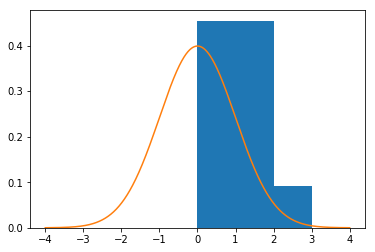

In [24]:
from numpy import *
import math
import matplotlib.pyplot as plt

slika, koord = plt.subplots()
koord.hist(x, bins=range(4), normed=True)
a = np.linspace(-4,4,num=1000)
plt.plot(a,f(a))


Također, grafički možemo provjeriti pripadnost podataka nekoj distribuciji. U ovom slučaju potvrđujemo rezultate dobivene KS-testom.

## $\chi^2$-distribucija

Slučajna varijabla X ima $\chi^2$-distribuciju s n stupnjeva slobode ako joj je funkcija gustoće:

 $f(x) = \frac{1}{\Gamma(\frac{n}{2})2^\left(\frac{n}{2}\right)}x^\left(\frac{n}{2}-1\right)e^\left(-\frac{x}{2}\right)$
 
 za x>0, inače 0
 
 Pišemo X~$\chi^2(n)$

Definirajmo najprije $\Gamma$-funkciju:

In [25]:
t = sp.Symbol('t')
def gamma(x):
    fja = t**(x-1)*sp.E**(-t)
    return sp.Integral(fja,(t,0,sp.oo)).doit()

In [26]:
gamma(1)

In [28]:
def fja_gustoce(x,n):
    if x.all()<0:
        return 0
    else:
        z = (1/(gamma(n/2)*2**(n/2)))*x**((n/2)-1)*sp.E**(-x/2)
    return z

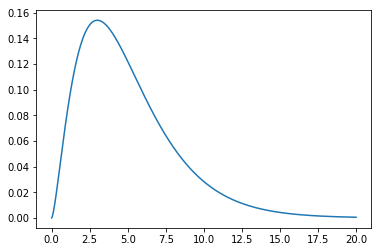

In [29]:
y = np.linspace(0,20,num=1000)
plt.plot(y,fja_gustoce(y,5))

$\chi^2$-distribucija koristi se u raznim statističkim testovima kao što su npr. test o pripadnosti diskretnoj razdiobi, test nezavisnosti, test homogenosti podataka, itd.
Prikazati ćemo test o pripadnosti binomnoj distribuciji kao jedan primjer.

#### Primjer 2. 

U biblioteci je slučajno odabrano 200 uzoraka po 5 knjiga. Dobivena je sljedeća empirijska distribucija broja oštećenih knjiga:


In [30]:
import pandas as pd

In [31]:
d = {'0 oštećenih': [0, 72], '1 oštećena': [1, 77], '2 oštećene': [2, 34],'3 oštećene': [3, 14],'4 oštećene': [4, 2], '5 oštećenih': [5, 1]}
df = pd.DataFrame(data=d)
df

,0 oštećenih,1 oštećena,2 oštećene,3 oštećene,4 oštećene,5 oštećenih
0,0,1,2,3,4,5
1,72,77,34,14,2,1


In [32]:
i = [0,1,2,3,4,5]
podaci = [72, 77, 34, 14, 2, 1]

In [33]:
f_obs = [72, 77, 34, 17]
f_exp = []
for j in range(0,3):
    f_exp.append(200*sp.binomial(5,j)*0.2**j*(1-0.2)**(5-j))
f_exp.append(11.584)
f_exp

In [34]:
from scipy.stats import chisquare
chisquare(f_obs,f_exp=[65.536,81.92,40.96,11.584])

Dakle, ne odbacujemo pretpostavku da podaci dolaze iz binomne razdiobe na razini značajnosti od 5% jer je p-vrijednost veća od razine značajnosti $\alpha$

U nastavku ćemo provesti statističku analizu nad ovim podacima te ćemo nacrtati "box and whiskers plot"

In [56]:
import statistics as s

In [58]:
print(s.mean(podaci))
print(s.variance(podaci))
print(s.median(podaci))
print(s.median_low(podaci))
print(s.median_high(podaci))
print(s.stdev(podaci))

33.333333333333336
1160.6666666666667
24.0
14
34
34.068558329736625


In [59]:
df.describe()

,0 oštećenih,1 oštećena,2 oštećene,3 oštećene,4 oštećene,5 oštećenih
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,36.000000,39.000000,18.000000,8.500000,3.000000,3.000000
std,50.911688,53.740115,22.627417,7.778175,1.414214,2.828427
min,0.000000,1.000000,2.000000,3.000000,2.000000,1.000000
25%,18.000000,20.000000,10.000000,5.750000,2.500000,2.000000
50%,36.000000,39.000000,18.000000,8.500000,3.000000,3.000000
75%,54.000000,58.000000,26.000000,11.250000,3.500000,4.000000
max,72.000000,77.000000,34.000000,14.000000,4.000000,5.000000


{'boxes': [<matplotlib.lines.Line2D at 0xdbcdcc0>],
 'caps': [<matplotlib.lines.Line2D at 0xdbd5710>,
 'fliers': [<matplotlib.lines.Line2D at 0xdbdc3c8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xdbd5f60>],
 'whiskers': [<matplotlib.lines.Line2D at 0xdbcde10>,
  <matplotlib.lines.Line2D at 0xdbd52e8>]}

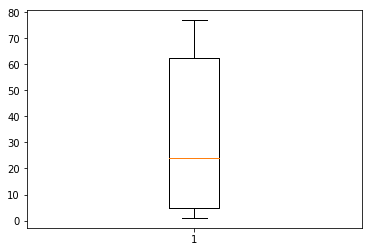

In [51]:
plt.boxplot(podaci)

Dat ćemo primjer nekih drugih neprekidnih distribucija, no nećemo provoditi posebnu analizu o njima.

## Studentova t-distribucija

Slučajna varijabla X ima studentovu t-distribuciju s n stupnjeva slobode ako joj je gustoća:

$f(x) = \frac{1}{\sqrt{n\pi}}\frac{\Gamma\left(\frac{n+1}{2}\right)}{\Gamma(\frac{n}{2})}\frac{1}{\left(1+\frac{x^2}{n}\right)^\left(\frac{n+1}{2}\right)}$

Pišemo X~t(n)

In [41]:
def fja_student(x,n):
    y = gamma((n+1)/2)/gamma(n/2)
    z = (1/sp.sqrt(n*sp.pi))*y*1/((1+(x**2)/n)**((n+1)/2))
    return z

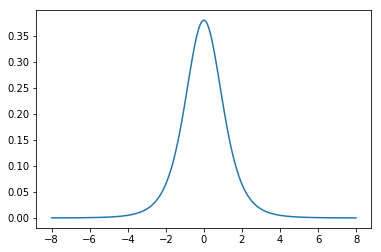

In [42]:
a = np.linspace(-8,8,num=1000)
plt.plot(a,fja_student(a,5))

## Fisherova F-distribucija

Slučajna varijabla X ima fisherovu F-distribuciju s parametrima n i m  ako joj je funkcija gustoće:

$f(x) = \frac{\Gamma(\frac{m+n}{2})}{\Gamma(\frac{m}{2})\Gamma(\frac{n}{2})}m^\left(\frac{m}{2}\right)n^\left(\frac{n}{2}\right)\frac{x^\left(\frac{m}{2}-1\right)}{(mx+n)^\left(\frac{m+n}{2}\right)}$


In [43]:
def fja_fisher(x,n,m):
    if x.all()<0:
        return 0
    y = gamma((m+n)/2)/(gamma(m/2)*gamma(n/2))
    a = (x**(m/2-1))/((m*x+n)**((m+n)/2))
    z = y*m**(m/2)*n**(n/2)*a
    return z

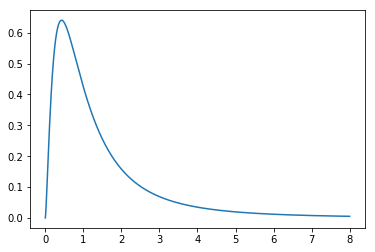

In [44]:
b = np.linspace(0,8,num=1000)
plt.plot(b,fja_fisher(b,5,5))

## Beta-distribucija



Slučajna varijabla X ima beta-distribuciju s parametrima $\alpha$ > 0 i $\beta$ > 0 ako joj je funkcija gustoće:
    
$f(x) = \frac{1}{B(\alpha,\beta)}x^\left(\alpha-1\right)(1-x)^\left(\beta-1\right)$ ako je 0 < x < 1, inače 0

Pišemo X~B($\alpha,\beta$)

In [70]:
def B(p,q):
    z = (gamma(p)*gamma(q))/(gamma(p+q))
    return z

In [71]:
def fja_beta(x,p,q):
    if 0<x<1:
        z = 1/(B(p,q))*x**(p-1)*(1-x)**(q-1)
        return z
    else:
        return 0
    

Prikazati ćemo još beta-distribuciju $B(\alpha,\beta)$, ali za različite kombinacije parametara $\alpha$ i $\beta$, uključivo $\alpha=\beta=1$ te $\alpha=\beta=2$.

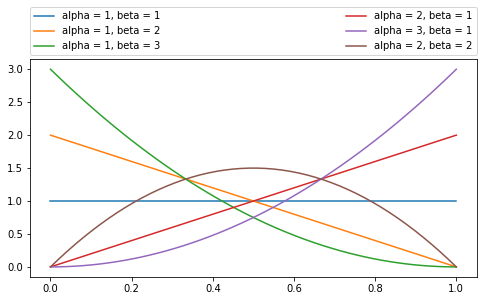

In [73]:
from scipy.stats import beta

plt.figure(figsize=(8,4))
mi = linspace(0,1)

plt.subplot(111)
for (a, b) in [(1,1), (1,2), (1,3), (2, 1), (3, 1), (2, 2)]:
    plt.plot(mi, beta.pdf(mi, a, b), label='alpha = ' + str(a) + ', beta = ' + str(b))
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
    

#### Primjer 5.
Do sada smo pokazali neke kraće primjere primjene statistike, no u praksi se koriste mnogo kompliciraniji podaci, tj. imamo puno veći uzorak. Zato ćemo sada prikazati jedan takav primjer. 

Prikazat ćemo podatke iz tablice o cijeni nekretnina u Bostonu i po kojim se kriterijima cijene mijenjaju, zatim ćemo provesti kratku analizu tih podataka.

In [45]:
from sklearn.datasets import load_boston
boston = load_boston()
print (boston.data.shape)
print (boston.target.shape)

(506, 13)
(506,)


Skup sadrži 506 primjera sa 13 numeričkih značajki. Opis skupa možemo dobiti na sljedeći način:

In [46]:
print (boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Prikažimo sada te podatke u tablici:

In [52]:
boston_df = pd.DataFrame(boston.data, 
    columns=['CRIM','ZN','IDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
boston_df


,CRIM,ZN,IDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


Za primjer uzet ćemo prvi stupac, odnosno stopu kriminala po glavi stanovnika u gradu.
Prikažimo te podatke na grafu.

In [54]:
print(pd.Series(boston_df['CRIM']))

0       0.00632
1       0.02731
2       0.02729
3       0.03237
4       0.06905
5       0.02985
6       0.08829
7       0.14455
8       0.21124
9       0.17004
10      0.22489
11      0.11747
12      0.09378
13      0.62976
14      0.63796
15      0.62739
16      1.05393
17      0.78420
18      0.80271
19      0.72580
20      1.25179
21      0.85204
22      1.23247
23      0.98843
24      0.75026
25      0.84054
26      0.67191
27      0.95577
28      0.77299
29      1.00245
         ...   
476     4.87141
477    15.02340
478    10.23300
479    14.33370
480     5.82401
481     5.70818
482     5.73116
483     2.81838
484     2.37857
485     3.67367
486     5.69175
487     4.83567
488     0.15086
489     0.18337
490     0.20746
491     0.10574
492     0.11132
493     0.17331
494     0.27957
495     0.17899
496     0.28960
497     0.26838
498     0.23912
499     0.17783
500     0.22438
501     0.06263
502     0.04527
503     0.06076
504     0.10959
505     0.04741
Name: CRIM, Length: 506,

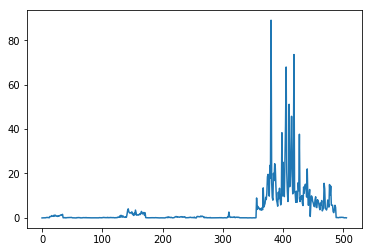

In [60]:
plt.plot(boston_df['CRIM'])

In [75]:
boston_df.idxmax()

CRIM       380
ZN          57
IDUS       488
CHAS       142
NOX        142
RM         364
AGE          8
DIS        353
RAD        356
TAX        488
PTRATIO    354
B            0
LSTAT      374
dtype: int64

In [55]:
boston_df.describe()

,CRIM,ZN,IDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


{'boxes': [<matplotlib.lines.Line2D at 0xface6d8>],
 'caps': [<matplotlib.lines.Line2D at 0xfadf550>,
 'fliers': [<matplotlib.lines.Line2D at 0xfae2208>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xfadfda0>],
 'whiskers': [<matplotlib.lines.Line2D at 0xface240>,
  <matplotlib.lines.Line2D at 0xfadf128>]}

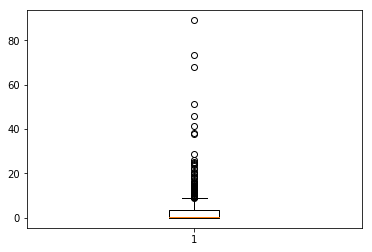

In [76]:
plt.boxplot(boston_df['CRIM'])